___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings.

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages.

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras.

After taking Machine learning deployment course, you will able to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques.

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms.

You are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. The purpose of clustering analysis is to cluster data with similar characteristics.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set.

Try to make your predictions by using the ***Classification Algorithms***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Introduction : https://youtu.be/7ELdizoi6BU


# #Tasks

#### 1. Exploratory Data Analysis
- EDA is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.
- In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics.

#### 2. Data Visualization
- Explore your data via visualizations to find-out:
 - What can be the reason of the churn?
 - Behavioral analysis of churns and not churns ..... etc.

#### 3. Cluster Analysis
- Apply ***clustering algorithms*** and writedown your conclusions about the clusters you created.

#### 5. Predictive Model Building
- Split Data as Train and Test set
- Built Classification Models(at least four models) and Evaluate Model Performances

#### 6. Model Deployement

- Save and Export the Best Model

## #Importing Modules and Predefined Functions#

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=UserWarning)


## 1. Exploratory Data Analysis

### 1.1. Apply Data Integrity Checks
* link: https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html

In [93]:
df=pd.read_csv(r"C:\Users\avbus\Downloads\HR_Dataset.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [94]:
df.shape

(14999, 10)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [96]:
df.isnull().any().any()

False

In [97]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [98]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [99]:

import re

def clean_column_names(df):
    df.columns = df.columns.str.strip()  
    df.columns = df.columns.str.lower() 
    df.columns = [re.sub(r'\W+', '_', col) for col in df.columns]  
    return df

df = clean_column_names(df)



Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')


In [100]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

In [101]:
print(df.duplicated().sum())  


3008


In [102]:
df = df.drop_duplicates()


## 2. Data Visualization

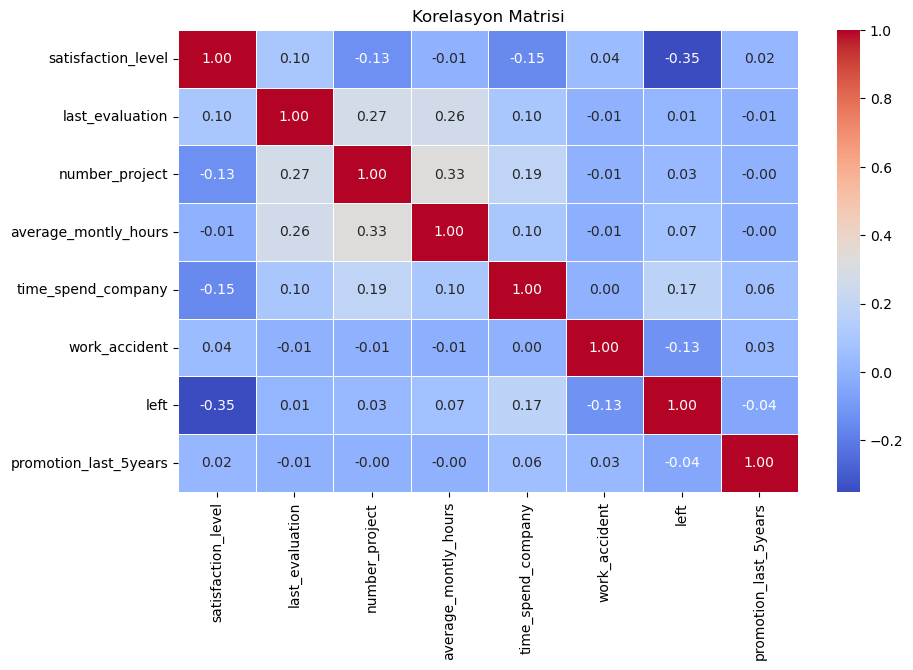

left                     1.000000
time_spend_company       0.173295
average_montly_hours     0.070409
number_project           0.030928
last_evaluation          0.013520
promotion_last_5years   -0.044657
work_accident           -0.125436
satisfaction_level      -0.350558
Name: left, dtype: float64


In [103]:
numeric_cols = df.select_dtypes(include=[np.number])

# Korelasyon matrisini hesaplama
corr_matrix = numeric_cols.corr()

# 'price' ile korelasyonları sıralama
price_corr = corr_matrix["left"].sort_values(ascending=False)

# Korelasyon ısı haritası çizme
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Korelasyon Matrisi")
plt.show()

# Price ile yüksek korelasyonlu değişkenleri göster
print(price_corr)

In [ ]:
sns.pairplot(pair_df, hue = 'left');

In [105]:
import sys
!{sys.executable} -m pip install deepchecks -U --quiet

## 3. Cluster Analysis
- Try to find hidden patterns in data with the help of unsupervised learning algorithms.
- Don't try to use clustering algoritms for classfication.

In [ ]:
hopkins

In [106]:
from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import data_integrity


# Kategorik sütunları belirleme
categorical_features = ["number_project", "time_spend_company", "work_accident", 
                        "promotion_last_5years", "departments", "salary"]

# Dataset objesi oluşturma (Kategorik değişkenler açıkça tanımlandı)
dataset = Dataset(df, label="left", cat_features=categorical_features)

# Data Integrity testlerini çalıştır
integrity_suite = data_integrity()
result = integrity_suite.run(dataset)

# Sonuçları gösterme
result.show()


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_39LH8V4IG7ACZR8RLNEAFV5XO">Data Integrity Sui…

In [107]:
df['departments'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [108]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [109]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder nesnesi oluştur
label_encoder = LabelEncoder()

# 'Departments' sütununu sayısal verilere dönüştür
df['departments'] = label_encoder.fit_transform(df['departments'])

# Sonuçları kontrol et
print(df['departments'].head())


0    7
1    7
2    7
3    7
4    7
Name: departments, dtype: int32


In [110]:
# Ordinal Encoding için öncelikle bir sözlük tanımlayın
salary_mapping = {'low': 0, 'medium': 1, 'high': 2}

# 'salary' sütununu sayısal verilere dönüştür
df['salary'] = df['salary'].map(salary_mapping)

# Sonuçları kontrol et
print(df['salary'].head())


0    0
1    1
2    1
3    0
4    0
Name: salary, dtype: int64


Küme merkezleri:
 [[ 1.50799731e-01 -5.49146547e-02 -4.14599873e-03 -3.78235071e-02
   4.33045129e-01  2.27481869e-01  7.62029957e+00 -1.81560417e-01
   6.69452590e-01]
 [ 2.13983605e-01 -2.26229351e-01 -3.48741090e-01 -2.65592313e-01
  -3.70882487e-01  3.13834874e-02 -1.31228437e-01  6.38630239e-03
  -5.97349432e-03]
 [-5.46079236e-01  5.71013657e-01  8.75373709e-01  6.68757301e-01
   9.04513344e-01 -9.25008142e-02 -1.31228437e-01 -5.05310457e-03
  -2.54683811e-02]]


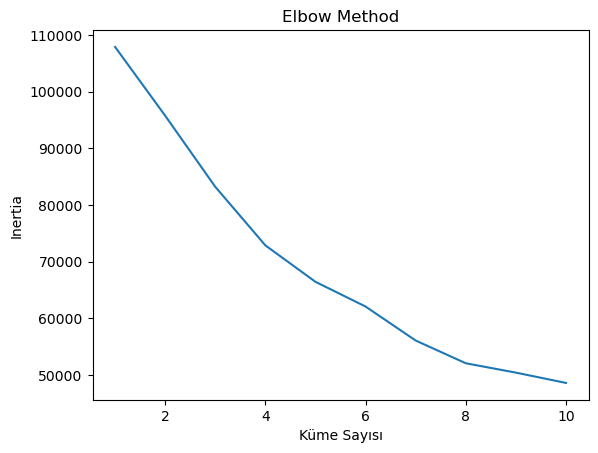

   satisfaction_level  last_evaluation  Cluster
0                0.38             0.53        1
1                0.80             0.86        2
2                0.11             0.88        2
3                0.72             0.87        2
4                0.37             0.52        1


In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Veriyi ölçeklendirme (normalizasyon)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('left', axis=1))  # 'left' target sütununu çıkarıyoruz

# 2. K-Means kümeleme uygulama
kmeans = KMeans(n_clusters=3, random_state=42)  # Küme sayısını 3 olarak belirledik, ihtiyaç halinde değiştirebilirsiniz
kmeans.fit(scaled_data)

# 3. Küme etiketlerini veri çerçevesine ekleyin
df['Cluster'] = kmeans.labels_

# Küme merkezlerini görmek için
print("Küme merkezleri:\n", kmeans.cluster_centers_)

# Küme sayısını belirlemek için Elbow Method (dirsek metodu) kullanabilirsiniz
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Elbow Method grafiği
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Küme Sayısı')
plt.ylabel('Inertia')
plt.show()

# Küme etiketlerinin ilk 5 satırını kontrol edelim
print(df[['satisfaction_level', 'last_evaluation', 'Cluster']].head())


In [112]:
df.groupby('Cluster')['left'].mean()

Cluster
0    0.039409
1    0.107545
2    0.321375
Name: left, dtype: float64

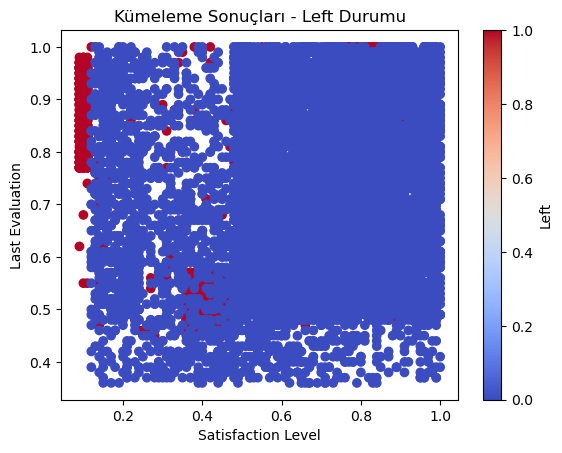

In [113]:
plt.scatter(df['satisfaction_level'], df['last_evaluation'], c=df['left'], cmap='coolwarm')
plt.title('Kümeleme Sonuçları - Left Durumu')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.colorbar(label='Left')
plt.show()


## 4. Predictive Model Building

### 4.1. Train-Test Validation Checks
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html

In [114]:
from sklearn.model_selection import train_test_split

X = df.drop('left', axis=1)  
y = df['left']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [115]:
from deepchecks.tabular.suites import train_test_validation

categorical_features = ["number_project", "time_spend_company", "work_accident", 
                        "promotion_last_5years", "departments", "salary", "Cluster"]

train_dataset = Dataset(X_train, label=y_train, cat_features=categorical_features)
test_dataset = Dataset(X_test, label=y_test, cat_features=categorical_features)


check = train_test_validation()
result = check.run(train_dataset, test_dataset)


result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_77IIMZMZ0VK0Y5QDSJPTD2127">Train Test Validat…

In [116]:
#pip install --upgrade deepchecks


### 4.2. Preprocessing

### 4.3. Classification Algorithms
 - Try at least 4 ML/DL algorithms.

#### 4.3.1. Model Building, Evaluating  and Tuning

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, C=1.0, penalty='l2'),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f" {name} Model Performansı:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 50)


 Logistic Regression Model Performansı:
Accuracy: 0.8174239266360984
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1998
           1       0.36      0.12      0.18       401

    accuracy                           0.82      2399
   macro avg       0.60      0.54      0.54      2399
weighted avg       0.76      0.82      0.78      2399

--------------------------------------------------
 Random Forest Model Performansı:
Accuracy: 0.980408503543143
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1998
           1       0.98      0.90      0.94       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399

--------------------------------------------------
 KNN Model Performansı:
Accuracy: 0.9383076281784076
              precision    recall  f1-score   support

     

In [118]:
from sklearn.metrics import accuracy_score, classification_report


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for model_name, model in models.items():
    model.fit(X_train, y_train)  
    
   
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f" {model_name} Train Accuracy: {train_acc:.4f}")
    print(f" {model_name} Test Accuracy: {test_acc:.4f}")
    print("\nTrain Seti Raporu:")
    print(classification_report(y_train, y_train_pred))
    print("\nTest Seti Raporu:")
    print(classification_report(y_test, y_test_pred))
    print("=" * 80)


📌 Logistic Regression Train Accuracy: 0.8198
📌 Logistic Regression Test Accuracy: 0.8174

Train Seti Raporu:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      8002
           1       0.39      0.15      0.22      1590

    accuracy                           0.82      9592
   macro avg       0.62      0.55      0.56      9592
weighted avg       0.77      0.82      0.79      9592


Test Seti Raporu:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1998
           1       0.36      0.12      0.18       401

    accuracy                           0.82      2399
   macro avg       0.60      0.54      0.54      2399
weighted avg       0.76      0.82      0.78      2399

📌 Random Forest Train Accuracy: 0.9999
📌 Random Forest Test Accuracy: 0.9800

Train Seti Raporu:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8002
           1

In [119]:
# LOGISTIC REGRESSION SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)  


X_train_smote, y_train_smote = SMOTE(random_state=42).fit_resample(X_train, y_train)

model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train_smote, y_train_smote)


y_pred_smote = model.predict(X_test)


print("SMOTE ile Logistic Regression Performansı:")
print(classification_report(y_test, y_pred_smote))




SMOTE ile Logistic Regression Performansı:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      1998
           1       0.46      0.82      0.59       401

    accuracy                           0.81      2399
   macro avg       0.71      0.81      0.73      2399
weighted avg       0.87      0.81      0.83      2399



In [120]:
# KNN Gridsearch
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'leaf_size': [10, 20, 30, 40]
}


In [121]:
# KNN modelini başlatın
knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)


print("En iyi parametreler:", grid_search.best_params_)


best_knn = grid_search.best_estimator_


Fitting 5 folds for each of 80 candidates, totalling 400 fits
En iyi parametreler: {'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [122]:

# En iyi parametrelerle KNN modelini oluştur
best_knn = KNeighborsClassifier(
    n_neighbors=7,
    weights='distance',
    metric='manhattan',
    leaf_size=10
)

best_knn.fit(X_train, y_train)


y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)


print("Eğitim Seti Performansı:")
print(classification_report(y_train, y_train_pred))
print("Accuracy:", accuracy_score(y_train, y_train_pred))

print("\nTest Seti Performansı:")
print(classification_report(y_test, y_test_pred))
print("Accuracy:", accuracy_score(y_test, y_test_pred))


Eğitim Seti Performansı:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8002
           1       1.00      1.00      1.00      1590

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592

Accuracy: 1.0

Test Seti Performansı:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1998
           1       0.81      0.88      0.84       401

    accuracy                           0.94      2399
   macro avg       0.89      0.92      0.90      2399
weighted avg       0.95      0.94      0.95      2399

Accuracy: 0.9441433930804501


In [123]:
# XGBoost GRIDSEARCH
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param_grid = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 4 , 5, 7, 10],
    "n_estimators": [50, 100, 200],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.6, 1.0]
}


xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")

grid_search = GridSearchCV(
    xgb_model, param_grid, 
    scoring="accuracy", cv=3, 
    n_jobs=-1, verbose=2
)

grid_search.fit(X_train, y_train)
print("En iyi parametreler:", grid_search.best_params_)


best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 240 candidates, totalling 720 fits
En iyi parametreler: {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 50, 'subsample': 1.0}
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1998
           1       0.98      0.91      0.94       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



In [124]:
from xgboost import XGBClassifier

# En iyi hiperparametrelerle model oluştur
xgb_model = XGBClassifier(
    max_depth=4, 
    learning_rate=0.1, 
    n_estimators=200, 
    colsample_bytree=0.7,  
    subsample=0.8,         
    use_label_encoder=False, 
    gamma = 0.1, 
    eval_metric='logloss'
)


xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

 XGBoost Train Accuracy: 0.9876
 XGBoost Test Accuracy: 0.9792

 Train Seti Raporu:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8002
           1       0.99      0.94      0.96      1590

    accuracy                           0.99      9592
   macro avg       0.99      0.97      0.98      9592
weighted avg       0.99      0.99      0.99      9592


 Test Seti Raporu:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1998
           1       0.97      0.91      0.94       401

    accuracy                           0.98      2399
   macro avg       0.97      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



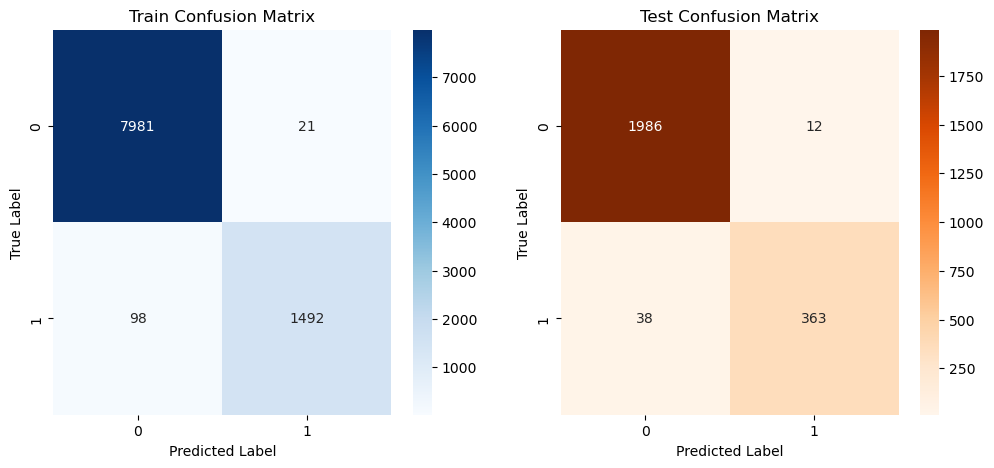

In [125]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)


train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f" XGBoost Train Accuracy: {train_acc:.4f}")
print(f" XGBoost Test Accuracy: {test_acc:.4f}")

print("\n Train Seti Raporu:")
print(classification_report(y_train, y_train_pred))

print("\n Test Seti Raporu:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix Görselleştirme
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Train Confusion Matrix")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Oranges", ax=axes[1])
axes[1].set_title("Test Confusion Matrix")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.show()


In [126]:
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f" XGBoost Train Accuracy: {train_acc:.4f}")
print(f" XGBoost Test Accuracy: {test_acc:.4f}")

print("\n Train Seti Raporu:")
print(classification_report(y_train, y_train_pred))

print("\n Test Seti Raporu:")
print(classification_report(y_test, y_test_pred))

 XGBoost Train Accuracy: 0.9876
 XGBoost Test Accuracy: 0.9792

 Train Seti Raporu:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8002
           1       0.99      0.94      0.96      1590

    accuracy                           0.99      9592
   macro avg       0.99      0.97      0.98      9592
weighted avg       0.99      0.99      0.99      9592


 Test Seti Raporu:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1998
           1       0.97      0.91      0.94       401

    accuracy                           0.98      2399
   macro avg       0.97      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



In [127]:
# XGBoost AGIRLIK
xgb_model = XGBClassifier(
    max_depth=10,
    learning_rate=0.1,
    n_estimators=100,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=2  
)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [128]:
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Doğruluk hesaplama
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f" XGBoost Train Accuracy: {train_acc:.4f}")
print(f" XGBoost Test Accuracy: {test_acc:.4f}")

# Classification Report
print("\n Train Seti Raporu:")
print(classification_report(y_train, y_train_pred))

print("\n Test Seti Raporu:")
print(classification_report(y_test, y_test_pred))

 XGBoost Train Accuracy: 0.9975
 XGBoost Test Accuracy: 0.9804

 Train Seti Raporu:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8002
           1       1.00      0.99      0.99      1590

    accuracy                           1.00      9592
   macro avg       1.00      0.99      1.00      9592
weighted avg       1.00      1.00      1.00      9592


 Test Seti Raporu:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1998
           1       0.98      0.91      0.94       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



##### 4.3.1.1 Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [129]:
import deepchecks.tabular as dct
from deepchecks.tabular.suites import model_evaluation


In [130]:
X_train_df = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])
X_test_df = pd.DataFrame(X_test, columns=[f'feature_{i}' for i in range(X_test.shape[1])])

# Etiketleri ekleyelim
X_train_df['left'] = y_train
X_test_df['left'] = y_test

In [132]:
from deepchecks.tabular import Dataset

# Deepchecks için dataset oluştur
train_ds = Dataset(X_train_df, label='left')
test_ds = Dataset(X_test_df, label='left')


deepchecks - WARNING - Column feature_0 only contains NaN values.
deepchecks - WARNING - Column feature_1 only contains NaN values.
deepchecks - WARNING - Column feature_2 only contains NaN values.
deepchecks - WARNING - Column feature_3 only contains NaN values.
deepchecks - WARNING - Column feature_4 only contains NaN values.
deepchecks - WARNING - Column feature_5 only contains NaN values.
deepchecks - WARNING - Column feature_6 only contains NaN values.
deepchecks - WARNING - Column feature_7 only contains NaN values.
deepchecks - WARNING - Column feature_8 only contains NaN values.
deepchecks - WARNING - Column feature_9 only contains NaN values.
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 0 categorical features were inferred.
deepchecks - WARNING - Column feature_0 only contains

In [133]:
import numpy as np

print(X_train_df.isna().sum())  # Her sütundaki NaN değer sayısını gösterir
print(X_test_df.isna().sum())   # Test setindeki NaN değerleri kontrol eder

print(X_train_df.head())  # İlk birkaç satırı görüntüle
print(X_test_df.head())


feature_0    9592
feature_1    9592
feature_2    9592
feature_3    9592
feature_4    9592
feature_5    9592
feature_6    9592
feature_7    9592
feature_8    9592
feature_9    9592
left            0
dtype: int64
feature_0    2399
feature_1    2399
feature_2    2399
feature_3    2399
feature_4    2399
feature_5    2399
feature_6    2399
feature_7    2399
feature_8    2399
feature_9    2399
left            0
dtype: int64
       feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
6426         NaN        NaN        NaN        NaN        NaN        NaN   
288          NaN        NaN        NaN        NaN        NaN        NaN   
5051         NaN        NaN        NaN        NaN        NaN        NaN   
11132        NaN        NaN        NaN        NaN        NaN        NaN   
3687         NaN        NaN        NaN        NaN        NaN        NaN   

       feature_6  feature_7  feature_8  feature_9  left  
6426         NaN        NaN        NaN        NaN     0  
288        

#### 4.3.2. Compare Models Performances
- Compare model performances according to metrics you choose for the problem.

In [135]:
from deepchecks.tabular.suites import model_evaluation
suite = model_evaluation()
suite.run(train_dataset, test_dataset, model)

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_BGLK3J5N8RZJ7AVA6E585L2HS">Model Evaluation S…

####  4.3.3 Prediction
- Make a demo prediction 

In [136]:
sample_input = X_test.iloc[0].values.reshape(1, -1)

prediction = model.predict(sample_input)
print("Tahmin Edilen Sınıf:", prediction[0])


Tahmin Edilen Sınıf: 1


In [137]:
df.iloc[0]

satisfaction_level         0.38
last_evaluation            0.53
number_project             2.00
average_montly_hours     157.00
time_spend_company         3.00
work_accident              0.00
left                       1.00
promotion_last_5years      0.00
departments                7.00
salary                     0.00
Cluster                    1.00
Name: 0, dtype: float64

## 5. Model Deployement
- Finalize your model with whole dataset and prepare for the deployment.

### 5.1. Final Model

In [142]:
import pickle
with open("xgboost_model.pkl", "wb") as model_file:
    pickle.dump(xgb_model, model_file)


In [143]:

sample_input = X_test.iloc[0].values.reshape(1, -1)


prediction = xgb_model.predict(sample_input)

print("Tahmin edilen sınıf:", prediction[0])


Tahmin edilen sınıf: 1


In [152]:
sample_input = X_test.iloc[0].values.reshape(1, -1)

xgb_pred = xgb_model.predict(sample_input)

print("XGBoost Tahmini:", xgb_pred[0])


XGBoost Tahmini: 1


In [153]:
df.iloc[0]

satisfaction_level         0.38
last_evaluation            0.53
number_project             2.00
average_montly_hours     157.00
time_spend_company         3.00
work_accident              0.00
left                       1.00
promotion_last_5years      0.00
departments                7.00
salary                     0.00
Cluster                    1.00
Name: 0, dtype: float64

### 5.2. Save and Export the Best Model

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___